In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define dataset path
dataset_path = "/content/drive/MyDrive/FYP_Project/Lsd_data"  # Change this to your dataset path

In [ ]:
# os.listdir(dataset_path)
# os.listdir(os.path.join(dataset_path, 'Lumpy Skin'))

In [ ]:
# Create ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,      # Normalize images
    validation_split=0.2   # Split 80% training, 20% validation
)

# Load Training Data (80%)
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(299, 299),  # Resize for InceptionV3
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load Validation Data (20%)
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 740 images belonging to 2 classes.
Found 183 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load Pretrained InceptionV3 Model (Exclude Top Layer)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze all layers except the last 4 convolutional layers
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Add Custom Layers
x = GlobalAveragePooling2D()(base_model.output)  # Converts to 1D vector
x = Dense(512, activation='relu')(x)  # Fully Connected Layer
x = Dropout(0.5)(x)  # Regularization
output = Dense(2, activation='softmax')(x)  # 2 Classes: Lumpy Skin, Normal Skin

# Create Final Model
model = Model(inputs=base_model.input, outputs=output)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model for 20 epochs
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 172s 6s/step - accuracy: 0.6206 - loss: 0.6799 - val_accuracy: 0.7978 - val_loss: 0.4625
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 308ms/step - accuracy: 0.8128 - loss: 0.4355 - val_accuracy: 0.8415 - val_loss: 0.3847
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 376ms/step - accuracy: 0.8534 - loss: 0.3683 - val_accuracy: 0.8197 - val_loss: 0.3624
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 309ms/step - accuracy: 0.8615 - loss: 0.3253 - val_accuracy: 0.8415 - val_loss: 0.3174
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 351ms/step - accuracy: 0.8628 - loss: 0.3115 - val_accuracy: 0.8689 - val_loss: 0.2958
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 316ms/step - accuracy: 0.8890 - loss: 0.2781 - val_accuracy: 0.8743 - val_loss: 0.2820
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 358ms/step - accuracy: 0.9129 - loss: 0.2377 - val_accuracy: 0.8798 - val_loss: 0.2765
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 353ms/step - accuracy: 0.9112 - loss: 0.2525 - val_accuracy: 0.

In [ ]:
# Evaluate model performance
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.9005 - loss: 0.1985
Validation Accuracy: 89.62%


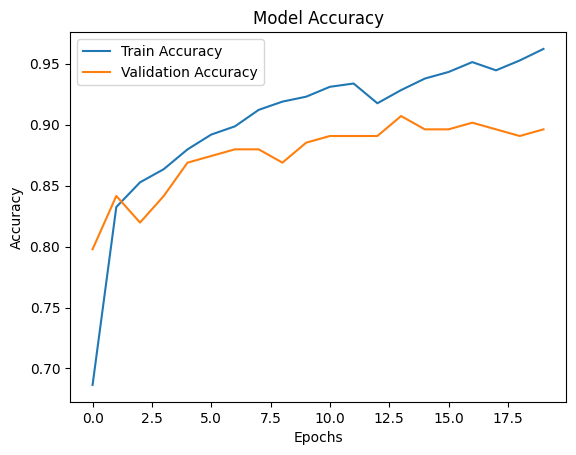

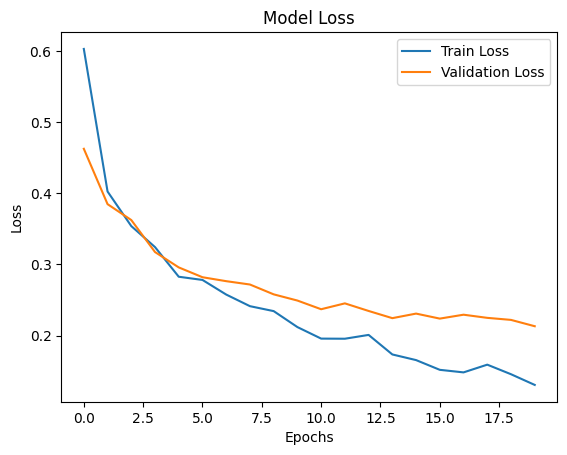

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
model.save("lumpy_skin_detector.h5")

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load an image for testing
img_path = "/content/drive/MyDrive/FYP_Project/Lsd_data/lpy3.jpg"  # Change this to your image path
img = image.load_img(img_path, target_size=(299, 299))  # Resize
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make a prediction
prediction = model.predict(img_array)
class_names = ['Lumpy Skin', 'Normal Skin']
predicted_class = class_names[np.argmax(prediction)]

print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Class: Lumpy Skin


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


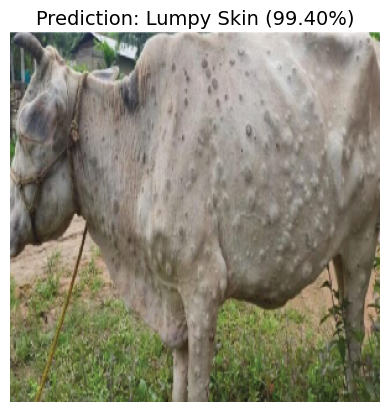

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the saved model
model = tf.keras.models.load_model("/content/drive/MyDrive/FYP_Project/lumpy_skin_detector.h5")

# Define class names
class_names = ['Lumpy Skin', 'Normal Skin']

# Load and preprocess the image
img_path = "/content/drive/MyDrive/FYP_Project/Lsd_data/lpy3.jpg"  # Change if needed
img = image.load_img(img_path, target_size=(299, 299))  # Resize to match model input
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array_expanded = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
prediction = model.predict(img_array_expanded)
predicted_class = class_names[np.argmax(prediction)]
confidence = np.max(prediction) * 100

# Display the image with predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)", fontsize=14)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


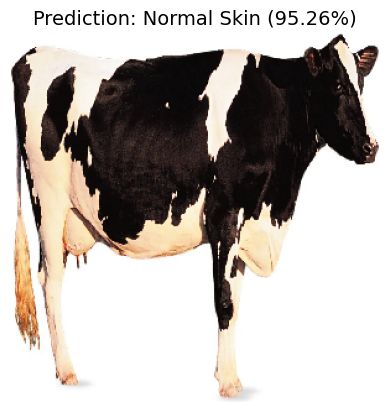

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the saved model
model = tf.keras.models.load_model("/content/drive/MyDrive/FYP_Project/lumpy_skin_detector.h5")

# Define class names
class_names = ['Lumpy Skin', 'Normal Skin']

# Load and preprocess the image
img_path = "/content/drive/MyDrive/FYP_Project/Lsd_data/cow-Holstein-Friesian.jpg"  # Change if needed
# img_path = "/content/drive/MyDrive/FYP_Project/Lsd_data/lpy3.jpg"
img = image.load_img(img_path, target_size=(299, 299))  # Resize to match model input
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array_expanded = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
prediction = model.predict(img_array_expanded)
predicted_class = class_names[np.argmax(prediction)]
confidence = np.max(prediction) * 100

# Display the image with predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)", fontsize=14)
plt.show()
